# Description:

### This comprehensive dataset captures the essence of Indian Premier League (IPL) cricket matches by focusing on the first innings. It provides a rich source of information for predictive modeling and analysis, offering a nuanced understanding of the dynamics that unfold during these crucial phases of the game.

# Features:
#### mid: Denotes the inning of the match, distinguishing between the first and second innings.
#### date: Represents the date of the match, offering temporal context to the data.
#### venue: Specifies the venue or ground where the match took place, influencing team strategies.
#### bat_team: Indicates the team currently batting, a critical aspect of understanding team dynamics.
#### bowl_team: Identifies the team currently bowling, shaping the match strategy.
#### batsman: Highlights the batsman on strike, a pivotal player in scoring runs.
#### bowler: Designates the bowler currently in action, a key figure in taking wickets.
#### runs: Quantifies the total runs scored by the batting team until the current moment in the inning.
#### wickets: Tracks the total number of wickets fallen until the current moment, affecting team performance.
#### overs: Records the total number of overs bowled until the current moment, influencing the pace of the game.
#### runs_last_5: Details the runs scored in the last 5 balls, offering insights into recent team performance.
#### wickets_last_5: Specifies the wickets taken in the last 5 balls, indicating recent breakthroughs or challenges.
#### striker: Represents the total runs made by the batsman on strike, a key contributor to the team's score.
#### non-striker: Indicates the total runs made by the non-striker, providing a holistic view of team contributions.
#### total: Serves as the target variable, representing the cumulative total runs aimed by the batting team for the inning.

# Use Case:
### This dataset is particularly valuable for tasks such as predictive modeling, where it can be employed to forecast the total runs a team is likely to score in the first inning based on a myriad of match-related parameters. Additionally, it enables in-depth statistical analysis to uncover patterns and factors influencing team performance in the dynamic landscape of IPL cricket matches.

# Note:

### The entries are organized chronologically, each capturing a specific moment in the inning.The target variable (total) encapsulates the cumulative total runs made by the batting team, serving as the focal point for predictive endeavors.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
data = pd.read_csv("ipl.csv")

In [29]:
data.head(20)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [30]:
data.tail(20)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
75994,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,92,7,17.1,25,2,23,3,129
75995,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,98,7,17.2,25,2,23,9,129
75996,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,99,7,17.3,26,2,23,10,129
75997,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,100,7,17.4,26,2,24,10,129
75998,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,101,7,17.5,26,2,24,10,129
75999,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,105,7,17.6,29,2,28,10,129
76000,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,JD Unadkat,106,7,18.1,28,2,28,11,129
76001,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,JD Unadkat,106,7,18.2,28,1,28,11,129
76002,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,JD Unadkat,107,7,18.3,29,1,29,11,129
76003,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,JD Unadkat,108,7,18.4,30,1,29,12,129


In [31]:
data.shape

(76014, 15)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [33]:
data.isna().sum().sum()

0

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mid,76014.0,308.627740,178.156878,1.0,154.0,308.0,463.0,617.0
runs,76014.0,74.889349,48.823327,0.0,34.0,70.0,111.0,263.0
wickets,76014.0,2.415844,2.015207,0.0,1.0,2.0,4.0,10.0
overs,76014.0,9.783068,5.772587,0.0,4.6,9.6,14.6,19.6
runs_last_5,76014.0,33.216434,14.914174,0.0,24.0,34.0,43.0,113.0
wickets_last_5,76014.0,1.120307,1.053343,0.0,0.0,1.0,2.0,7.0
striker,76014.0,24.962283,20.079752,0.0,10.0,20.0,35.0,175.0
non-striker,76014.0,8.869287,10.795742,0.0,1.0,5.0,13.0,109.0
total,76014.0,160.901452,29.246231,67.0,142.0,162.0,181.0,263.0


In [35]:
data.describe(include="object").T

,count,unique,top,freq
date,76014,442,2010-03-25,257
venue,76014,35,M Chinnaswamy Stadium,7443
bat_team,76014,14,Mumbai Indians,10213
bowl_team,76014,14,Delhi Daredevils,10245
batsman,76014,411,SK Raina,1921
bowler,76014,329,Harbhajan Singh,1404


In [36]:
data.drop(columns=["date"],inplace=True)

In [37]:
data_num = data.select_dtypes(["int","float"])
data_obj = data.select_dtypes(["object"])

In [38]:
data_obj = data_obj.columns.to_list()

In [39]:
data_num_col = data_num.columns.to_list()
data_num_col

['mid',
 'runs',
 'wickets',
 'overs',
 'runs_last_5',
 'wickets_last_5',
 'striker',
 'non-striker',
 'total']

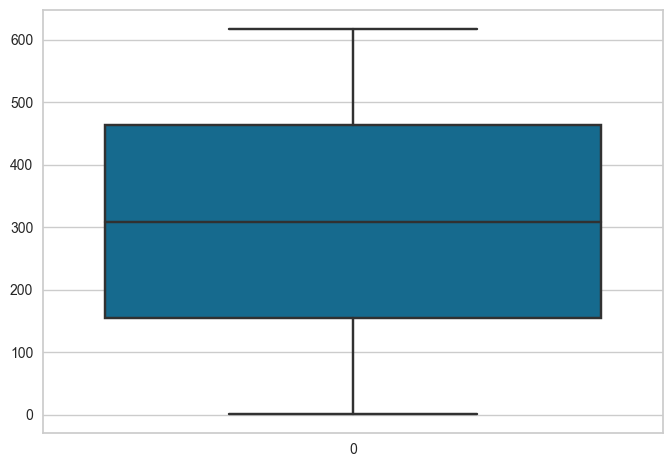

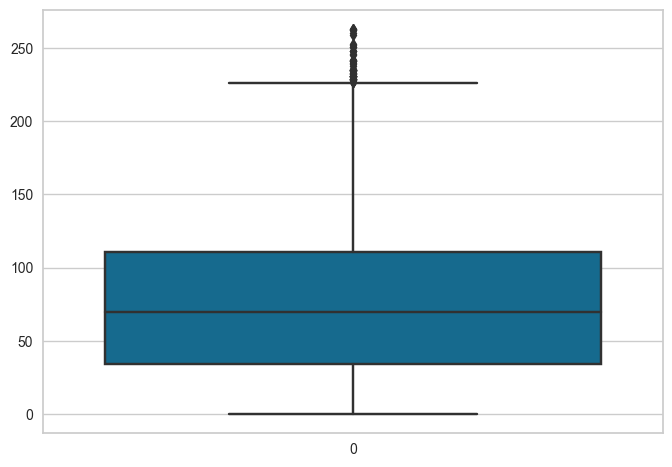

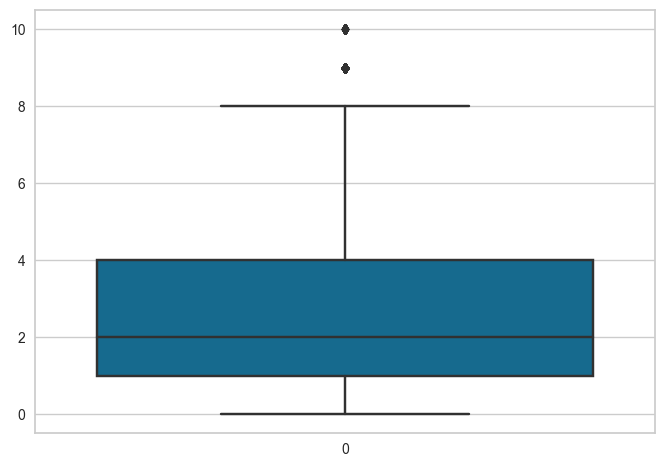

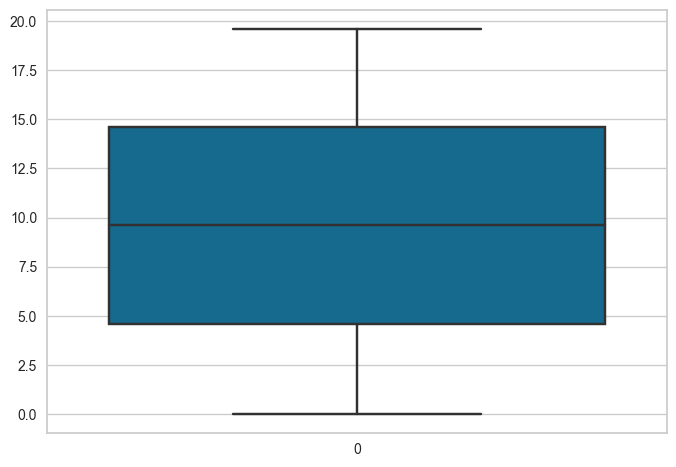

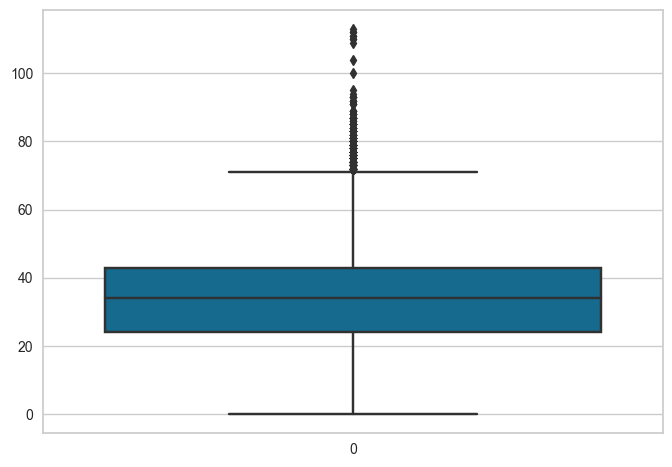

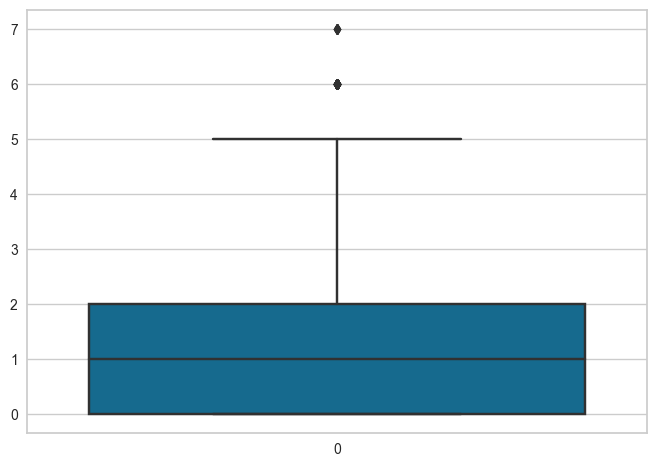

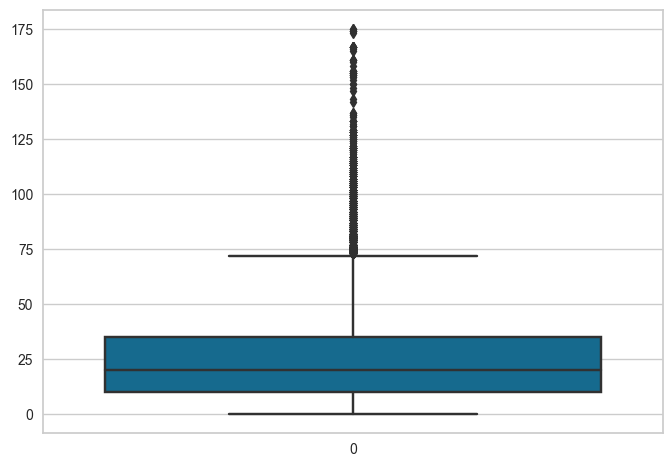

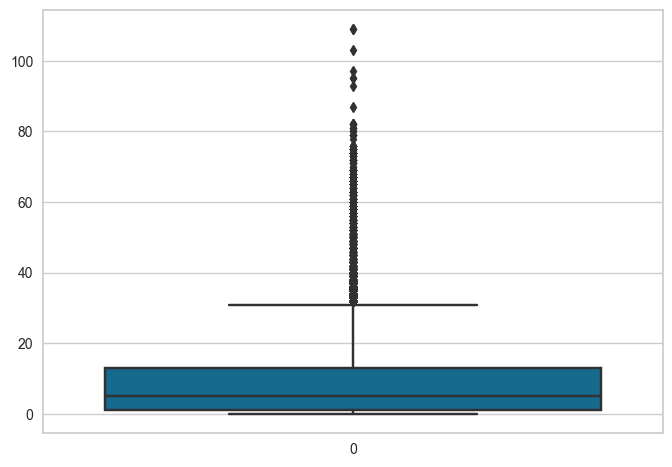

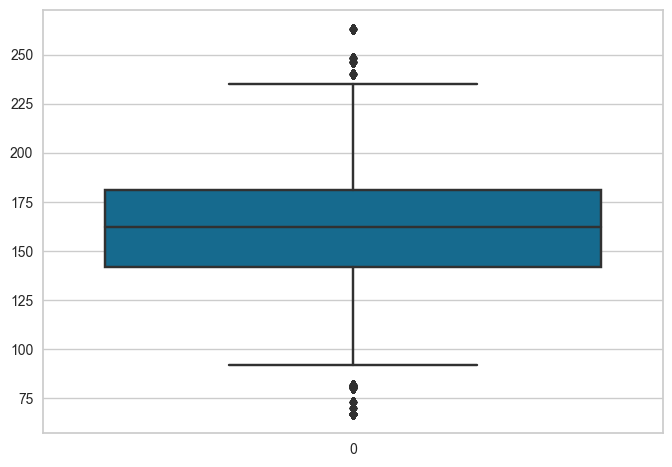

In [40]:
for i,v in enumerate(data_num_col):
    sns.boxplot(data[v])
    plt.show()

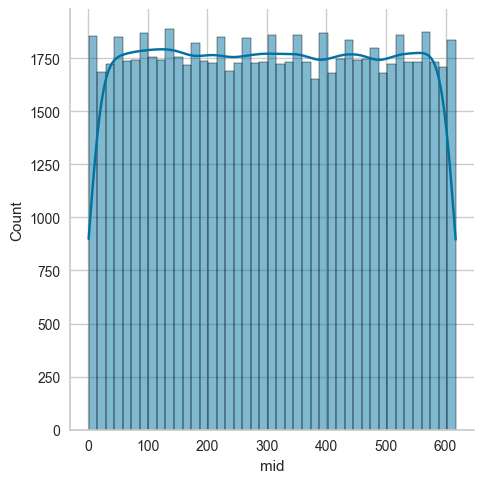

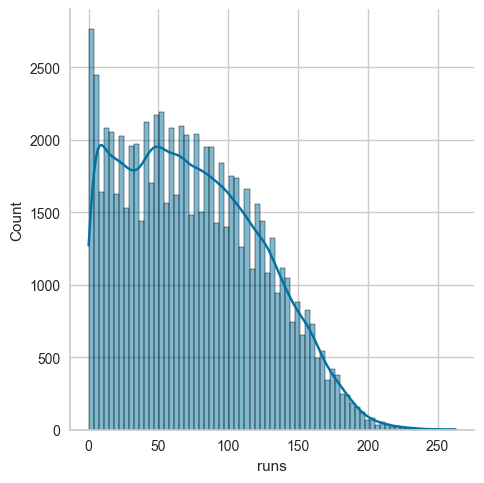

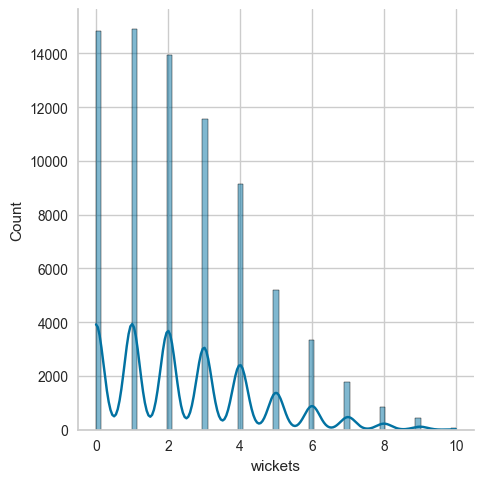

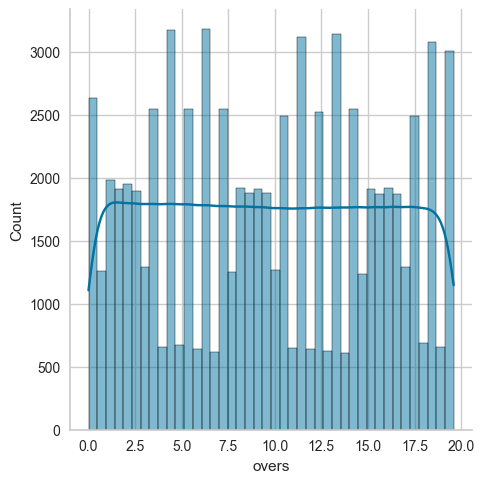

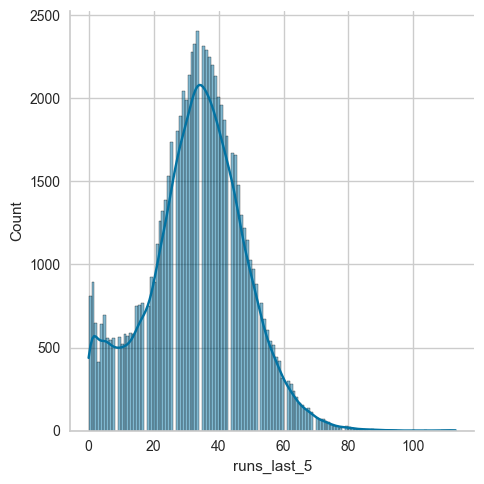

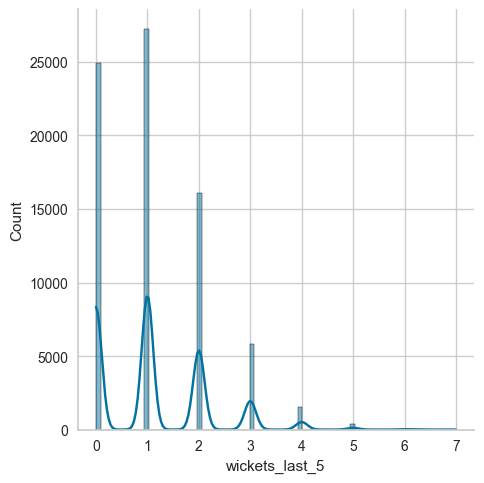

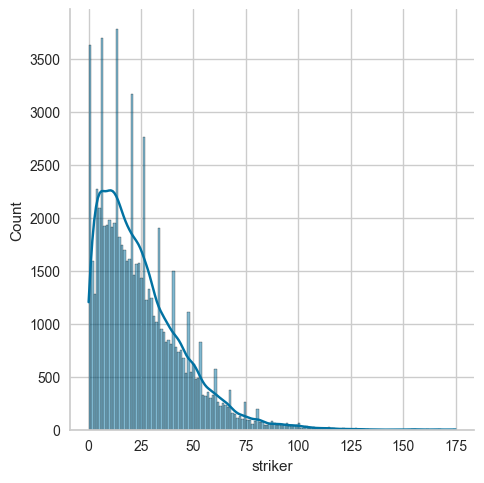

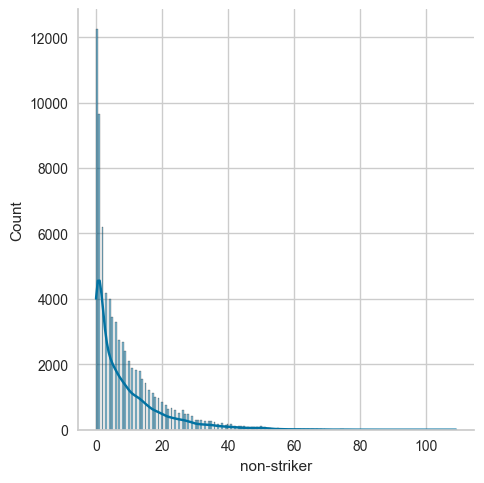

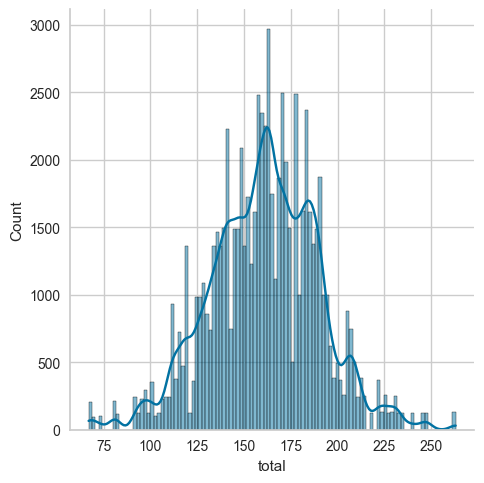

In [41]:
for i,v in enumerate(data_num_col):
    sns.displot(data[v],kde=True)
    plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in data_obj:
    data[i] = label.fit_transform(data[i])
data

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,14,6,12,328,201,1,0,0.1,1,0,0,0,222
1,1,14,6,12,61,201,1,0,0.2,1,0,0,0,222
2,1,14,6,12,61,201,2,0,0.2,2,0,0,0,222
3,1,14,6,12,61,201,2,0,0.3,2,0,0,0,222
4,1,14,6,12,61,201,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,23,7,10,172,96,121,7,19.2,40,0,40,12,129
76010,617,23,7,10,172,96,127,7,19.3,46,0,46,12,129
76011,617,23,7,10,172,96,128,7,19.4,47,0,47,12,129
76012,617,23,7,10,215,96,129,7,19.5,48,0,47,13,129


In [43]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60811, 13)
(60811,)
(15203, 13)
(15203,)


In [45]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
testpred = dt.predict(x_test)
trainpred = dt.predict(x_train)

In [47]:
accuracy_score(trainpred,y_train)*100

100.0

In [48]:
accuracy_score(testpred,y_test)*100

99.9934223508518

In [49]:
testpred

array([161, 162, 141, ..., 135, 112, 176], dtype=int64)